In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import time
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os
import sys
sys.path.append('..')
from field import read_data, plot_overview

In [8]:
parent_path = '../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/EPA-asfaltprojekt/On-line PAH Projekt KU/ACSM/vesterbrogade130623/'

data = read_data(path, parent_path)

c:\Users\B363580\Documents\GitHub\NFA_project\field.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Sum'] = df[df.keys()[2:]].sum(axis='columns')


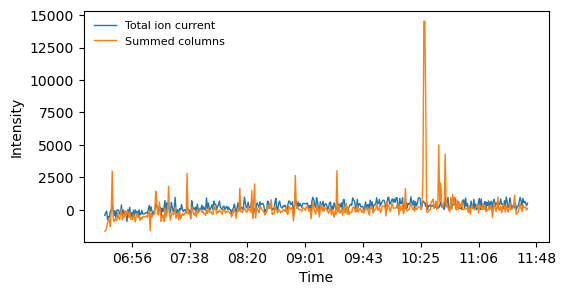

In [6]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_overview(ax, data['EPA_vesterbrogade_130623'])

fig.savefig('Field_data/EPA_vesterbrogade_130623.png', dpi = 600)

C:\Users\B363580\AppData\Local\Temp\ipykernel_9456\3471286952.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  peak = peak[after_mask]


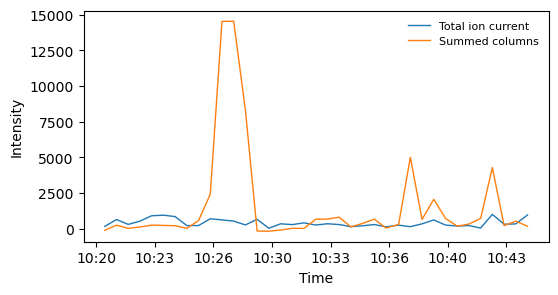

In [9]:
before_mask = data['EPA_vesterbrogade_130623']['t_base'] > '6/13/2023 10:20:00'
after_mask = data['EPA_vesterbrogade_130623']['t_base'] < '6/13/2023 10:45:00'

peak = data['EPA_vesterbrogade_130623'][before_mask]
peak = peak[after_mask]

# Figure out how to flip dataframe to make a plot of intensity vs m/z value

fig, ax = plt.subplots(figsize = (6, 3))

plot_overview(ax, peak)

fig.savefig('Field_data/EPA_vesterbrogade_130623_peak.png', dpi = 600)